In [2]:
print("hello")

hello


In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('Kiana_cleaned_covid19_daily_reports_US.csv')


In [5]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Date,state,name
0,1001,Autauga,Alabama,US,2021-01-02 05:22:33,32.539527,-86.644082,4239.0,50.0,0.0,4189.0,"Autauga, Alabama, US",7587.391935,1.179523,2021-01-01,AL,Autauga County
1,1003,Baldwin,Alabama,US,2021-01-02 05:22:33,30.727750,-87.722071,13823.0,169.0,0.0,13654.0,"Baldwin, Alabama, US",6192.157109,1.222600,2021-01-01,AL,Baldwin County
2,1005,Barbour,Alabama,US,2021-01-02 05:22:33,31.868263,-85.387129,1517.0,33.0,0.0,1484.0,"Barbour, Alabama, US",6145.183505,2.175346,2021-01-01,AL,Barbour County
3,1007,Bibb,Alabama,US,2021-01-02 05:22:33,32.996421,-87.125115,1854.0,46.0,0.0,1808.0,"Bibb, Alabama, US",8279.003304,2.481122,2021-01-01,AL,Bibb County
4,1009,Blount,Alabama,US,2021-01-02 05:22:33,33.982109,-86.567906,4693.0,63.0,0.0,4630.0,"Blount, Alabama, US",8115.726490,1.342425,2021-01-01,AL,Blount County


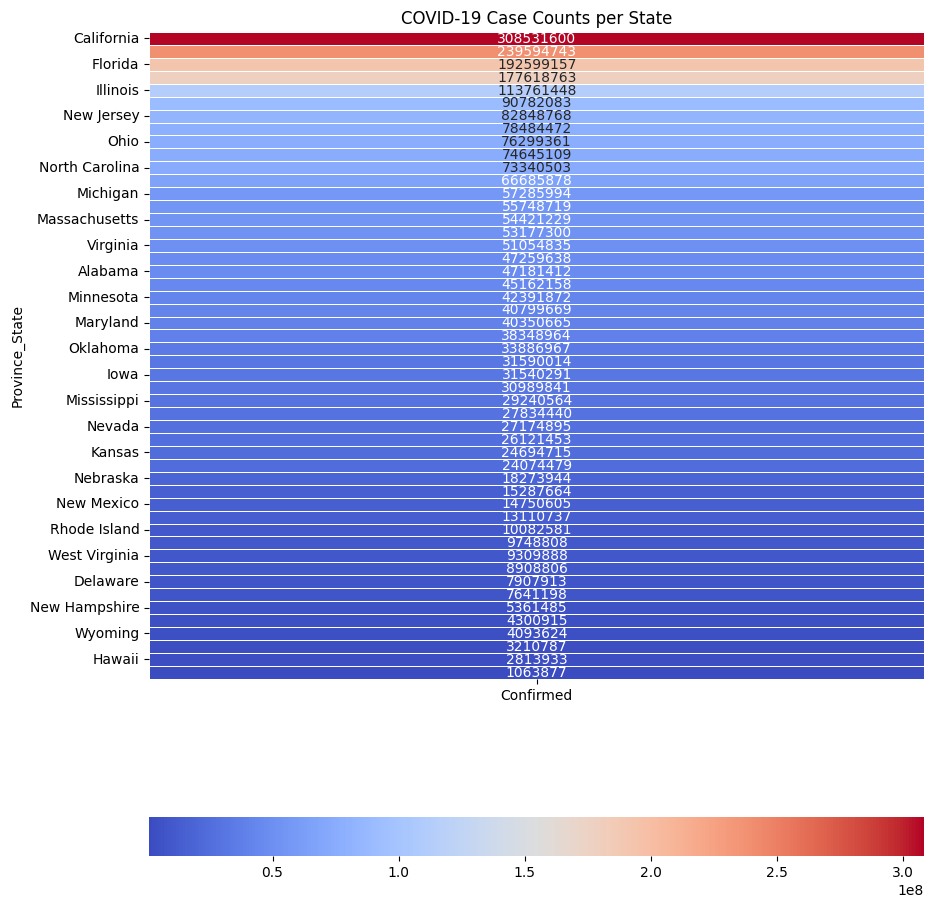

In [23]:
# Cases per state visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

statewise_cases = df.groupby("Province_State", as_index=False)["Confirmed"].sum()
statewise_cases = statewise_cases.dropna()
statewise_cases = statewise_cases.sort_values(by="Confirmed", ascending=False)

plt.figure(figsize=(10, 12))
sns.heatmap(statewise_cases.set_index("Province_State"), cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5, cbar_kws={'orientation': 'horizontal'})
plt.title("COVID-19 Case Counts per State")
plt.show()



In [13]:
print(df.columns)

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio', 'Date', 'state',
       'name'],
      dtype='object')


In [18]:
all_unique_states = df["Province_State"].unique()
num_unique_states = len(all_unique_states)

print(f"Total unique states in the dataset: {num_unique_states}")
print("List of the states:", all_unique_states)


Total unique states in the dataset: 50
List of the states: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


<Figure size 1000x800 with 0 Axes>

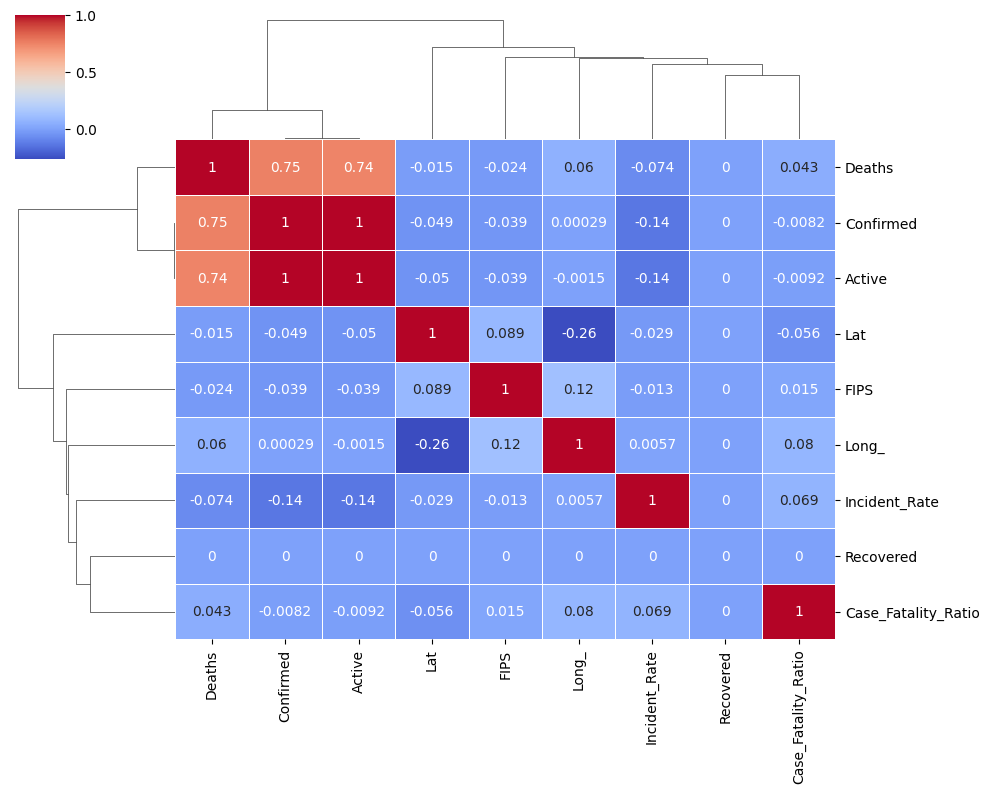

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

numeric_columns = ['FIPS', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate', 'Case_Fatality_Ratio']
df_numeric_based = df[numeric_columns]
corr_matrix = df_numeric_based.corr()
corr_matrix = corr_matrix.replace([np.inf, -np.inf], np.nan)  
corr_matrix = corr_matrix.fillna(0)  

plt.figure(figsize=(10, 8))
sns.clustermap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, figsize=(10, 8))
plt.show()

# Notes for the below visualization: 
    # 1. When there is a higher number of confirmed cases, there are more deaths (strong correlation)
    # 2. The same thing is applied to confirmed and active cases, as active cases are a subset of confirmed cases
    # 3. Locations with more active cases tend to have higher death counts

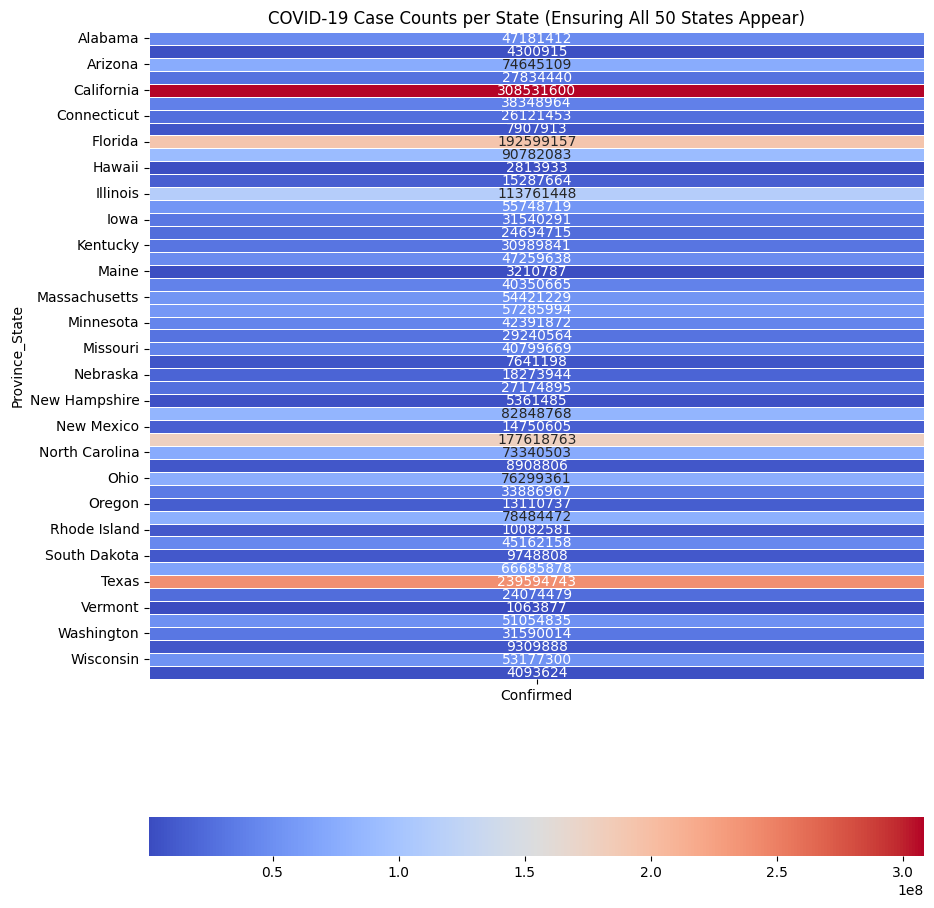

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Group by state and sum confirmed cases
statewise_cases = df.groupby("Province_State", as_index=False)["Confirmed"].sum()

# Convert to numeric and fill NaN values with 1 (ensures all states appear)
statewise_cases["Confirmed"] = pd.to_numeric(statewise_cases["Confirmed"], errors="coerce").fillna(1)

# Replace 0 cases with 1 to ensure visibility
statewise_cases["Confirmed"] = statewise_cases["Confirmed"].replace(0, 1)

# Manually ensure all 50 states are included, even if missing from data
all_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
    'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
    'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
    'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
    'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
    'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

# Ensure all states are in the DataFrame (even if missing from data)
statewise_cases = statewise_cases.set_index("Province_State").reindex(all_states, fill_value=1)

# Sort alphabetically for consistent viewing
statewise_cases = statewise_cases.sort_index()

# Set figure size
plt.figure(figsize=(10, 12))

# Generate heatmap for case counts per state
sns.heatmap(statewise_cases, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5, 
            cbar_kws={'orientation': 'horizontal'})

# Add title
plt.title("COVID-19 Case Counts per State (Ensuring All 50 States Appear)")

# Show the heatmap
plt.show()


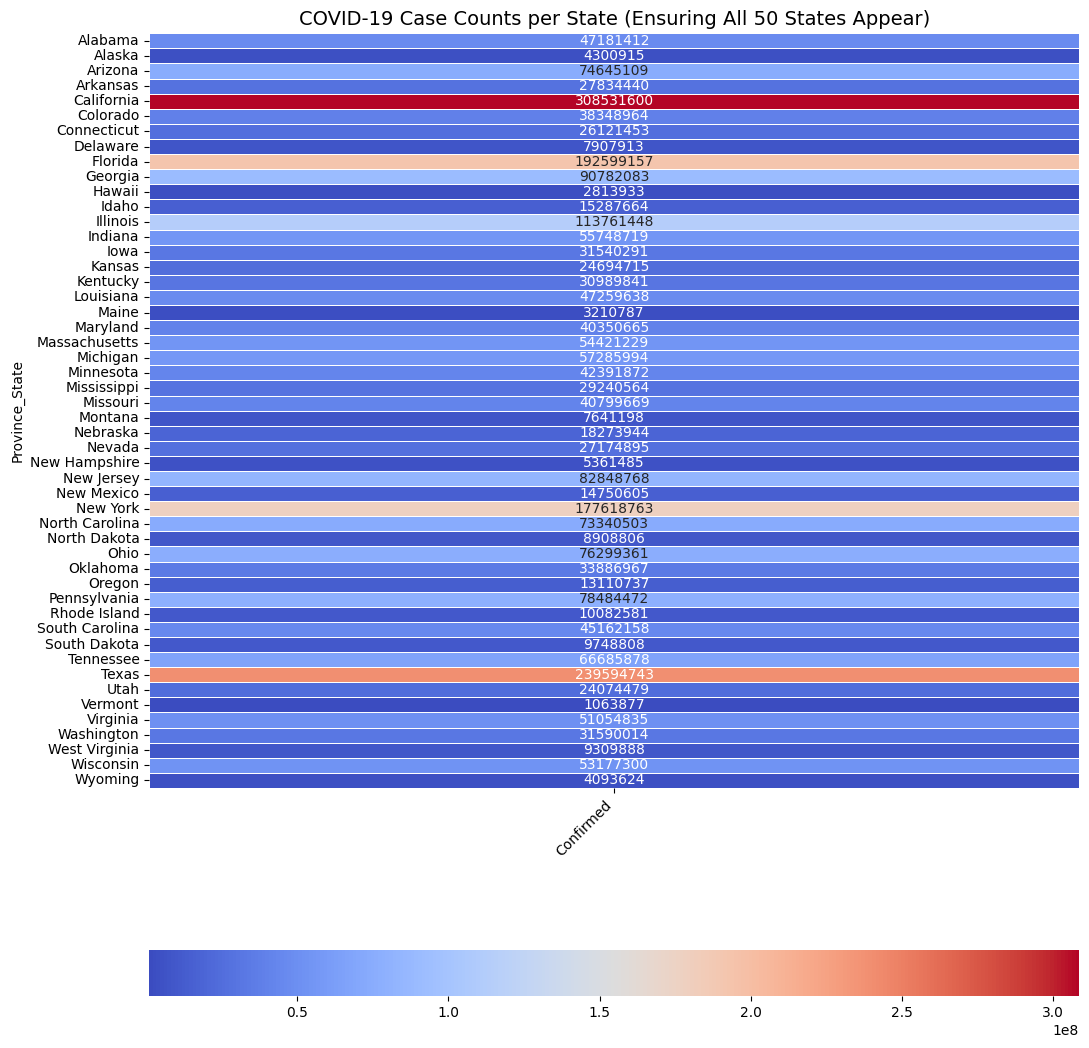

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(12, 14))

# Generate heatmap for case counts per state
sns.heatmap(statewise_cases, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5, 
            cbar_kws={'orientation': 'horizontal'})

# Rotate labels for readability
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Add title
plt.title("COVID-19 Case Counts per State (Ensuring All 50 States Appear)", fontsize=14)

# Show the heatmap
plt.show()
